In [1]:

import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: statsmodels in c:\users\admin\appdata\local\programs\python\python312\lib\site-packages (0.14.4)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv('smoking.csv')
df.head()

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2023,10-14,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3


In [4]:
df2 = df.drop(columns=['Peer_Influence','Gender','School_Programs','Substance_Education','Access_to_Counseling','Socioeconomic_Status','Age_Group'])
print(df2)

      Year  Smoking_Prevalence  Drug_Experimentation  Family_Background  \
0     2024               18.85                 32.40                  1   
1     2024               34.88                 41.57                 10   
2     2023               42.00                 56.80                  2   
3     2024               33.75                 42.90                  9   
4     2023               47.90                 39.62                  2   
...    ...                 ...                   ...                ...   
9995  2023               49.17                 10.21                  4   
9996  2020               48.00                 30.85                  8   
9997  2021               47.62                 39.54                  7   
9998  2022                9.37                 11.64                 10   
9999  2023               43.77                 21.95                  3   

      Mental_Health  Parental_Supervision  Community_Support  Media_Influence  
0                 5

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Smoking_Prevalence    10000 non-null  float64
 2   Drug_Experimentation  10000 non-null  float64
 3   Family_Background     10000 non-null  int64  
 4   Mental_Health         10000 non-null  int64  
 5   Parental_Supervision  10000 non-null  int64  
 6   Community_Support     10000 non-null  int64  
 7   Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


In [6]:
df2.describe()

,Year,Smoking_Prevalence,Drug_Experimentation,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2022.000500,27.439257,40.150182,5.513300,5.469800,5.528000,5.544600,5.506200
std,1.425027,12.975528,17.515917,2.865038,2.879326,2.891514,2.870302,2.872836
min,2020.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021.000000,16.160000,24.920000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2022.000000,27.355000,40.100000,6.000000,5.000000,6.000000,6.000000,6.000000
75%,2023.000000,38.672500,55.462500,8.000000,8.000000,8.000000,8.000000,8.000000
max,2024.000000,50.000000,69.990000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
kategorikal=df2.select_dtypes(include='float').columns
kategorikal

Index(['Smoking_Prevalence', 'Drug_Experimentation'], dtype='object')

In [8]:

df2['Smoking_Prevalence'] = pd.to_numeric(df['Smoking_Prevalence'], errors='coerce')
df2['Drug_Experimentation'] = pd.to_numeric(df['Drug_Experimentation'], errors='coerce')


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Smoking_Prevalence    10000 non-null  float64
 2   Drug_Experimentation  10000 non-null  float64
 3   Family_Background     10000 non-null  int64  
 4   Mental_Health         10000 non-null  int64  
 5   Parental_Supervision  10000 non-null  int64  
 6   Community_Support     10000 non-null  int64  
 7   Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


In [10]:
df2.isna().sum()

Year                    0
Smoking_Prevalence      0
Drug_Experimentation    0
Family_Background       0
Mental_Health           0
Parental_Supervision    0
Community_Support       0
Media_Influence         0
dtype: int64

In [11]:
duplicate = df2[df2.duplicated()]
duplicate

,Year,Smoking_Prevalence,Drug_Experimentation,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence


In [12]:
df2.drop_duplicates(inplace=True)

In [13]:
df2.shape

(10000, 8)

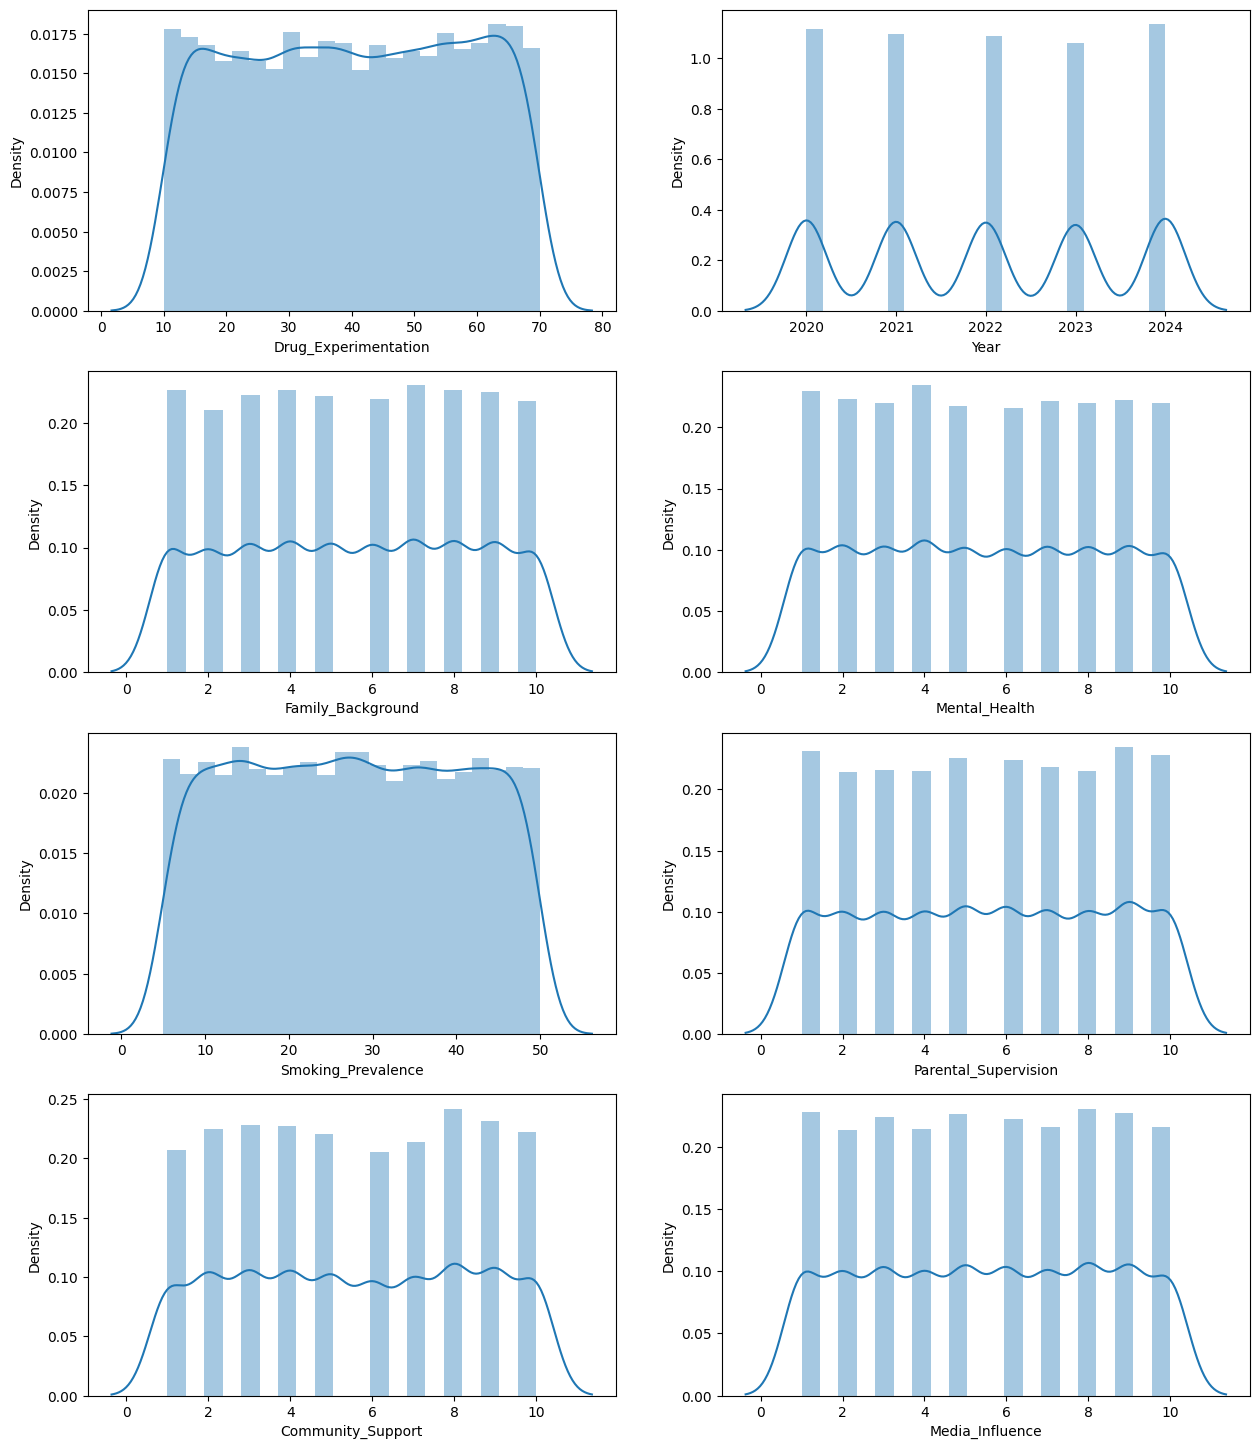

In [220]:
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(4, 2, figsize=(15, 18))

sns.distplot(df["Drug_Experimentation"], ax=axes[0, 0])
sns.distplot(df["Year"], ax=axes[0, 1])
sns.distplot(df["Family_Background"], ax=axes[1, 0])
sns.distplot(df["Mental_Health"], ax=axes[1, 1])
sns.distplot(df["Smoking_Prevalence"], ax=axes[2, 0])
sns.distplot(df["Parental_Supervision"], ax=axes[2, 1])
sns.distplot(df["Community_Support"], ax=axes[3, 0])
sns.distplot(df["Media_Influence"], ax=axes[3, 1])
plt.show()

In [6]:
import warnings

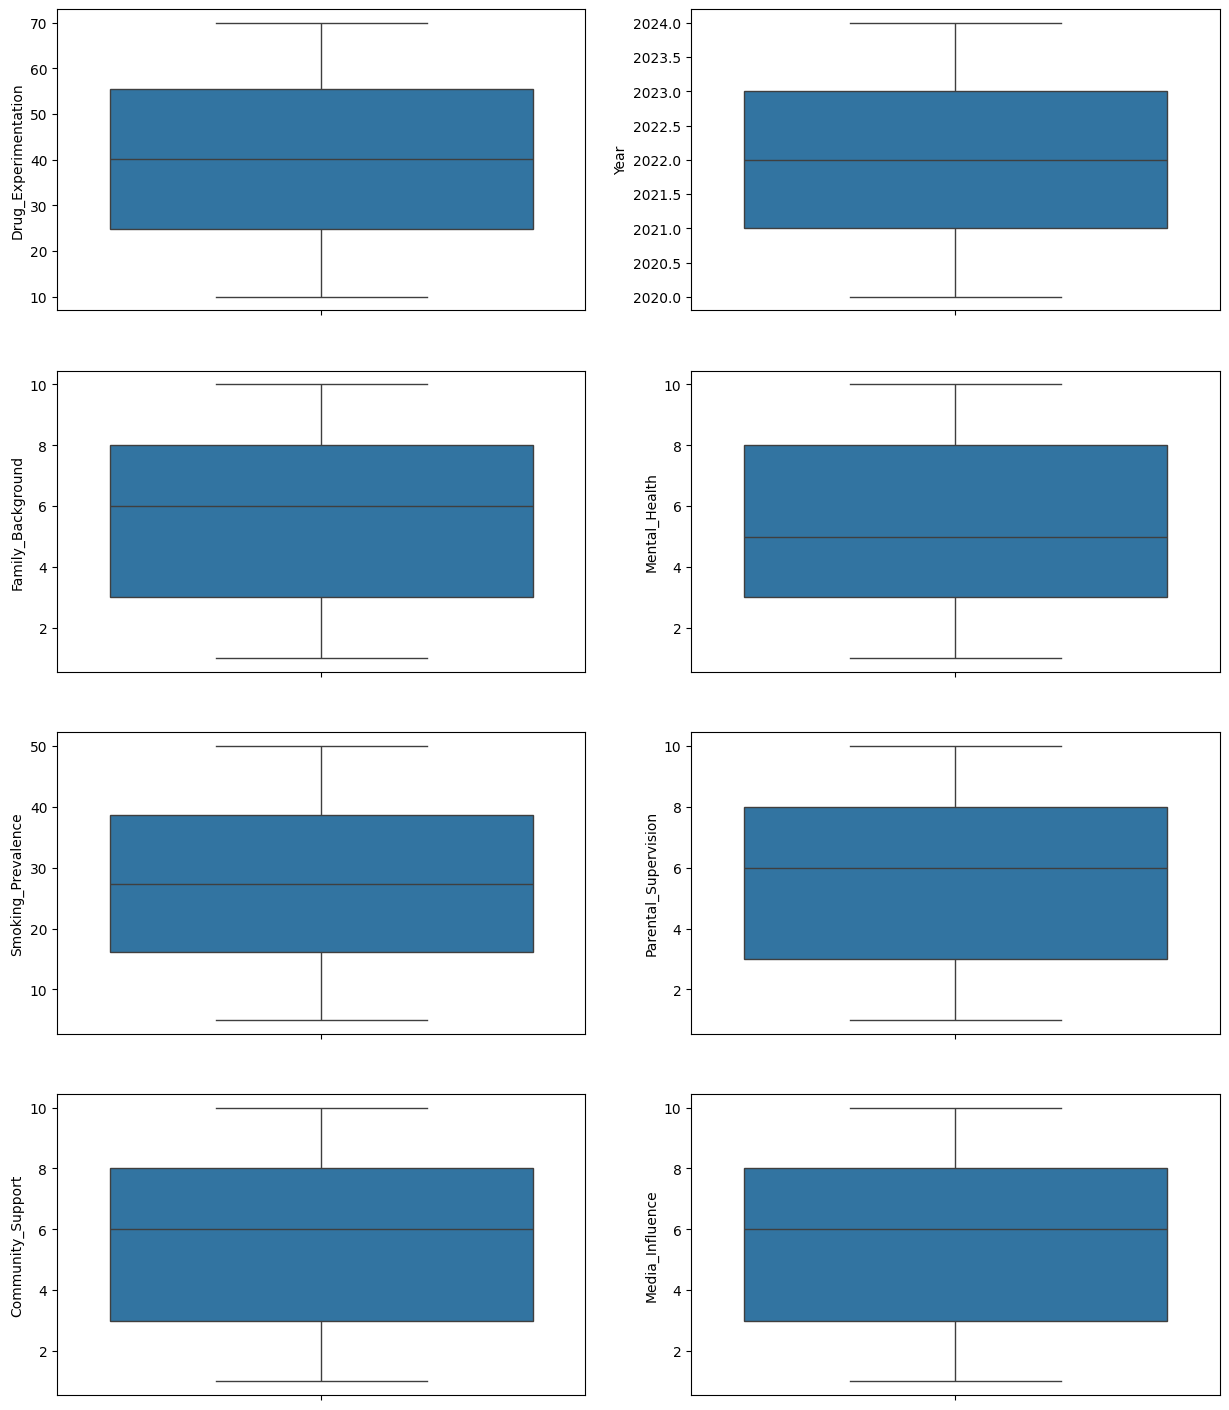

In [301]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(4, 2, figsize=(15, 18))

sns.boxplot(df["Drug_Experimentation"], ax=axes[0, 0])
sns.boxplot(df["Year"], ax=axes[0, 1])
sns.boxplot(df["Family_Background"], ax=axes[1, 0])
sns.boxplot(df["Mental_Health"], ax=axes[1, 1])
sns.boxplot(df["Smoking_Prevalence"], ax=axes[2, 0])
sns.boxplot(df["Parental_Supervision"], ax=axes[2, 1])
sns.boxplot(df["Community_Support"], ax=axes[3, 0])
sns.boxplot(df["Media_Influence"], ax=axes[3, 1])
plt.show()

Syarat distribusi normal pada data hanya diberlakukan pada variabel Y, akan tetapi kita akan melihat sebaran data dari semua variabel.

Terlihat dari histogram, bahwa Drug Experimentation dan Smoking Prevalence menunjukkan distribusi yang mendekati normal, meskipun tidak sepenuhnya simetris. Year, Family Background, Mental Health, Parental Supervision, Community Support, dan Media Influence menunjukkan distribusi yang tidak normal. Distribusi ini cenderung memiliki puncak-puncak yang terpisah atau berbentuk diskrit, yang tidak menyerupai distribusi normal.

Dan dari gambar boxplot, dilihat dari sebaran data pada kuartal 1, kuartal 2 dan kuartal 3, apakah memiliki bentuk yang simetris?

Simetris: Drug Experimentation dan Smoking Prevalence.
Tidak Simetris: Year, Family Background, Mental Health, Parental Supervision, Community Support, dan Media Influence.

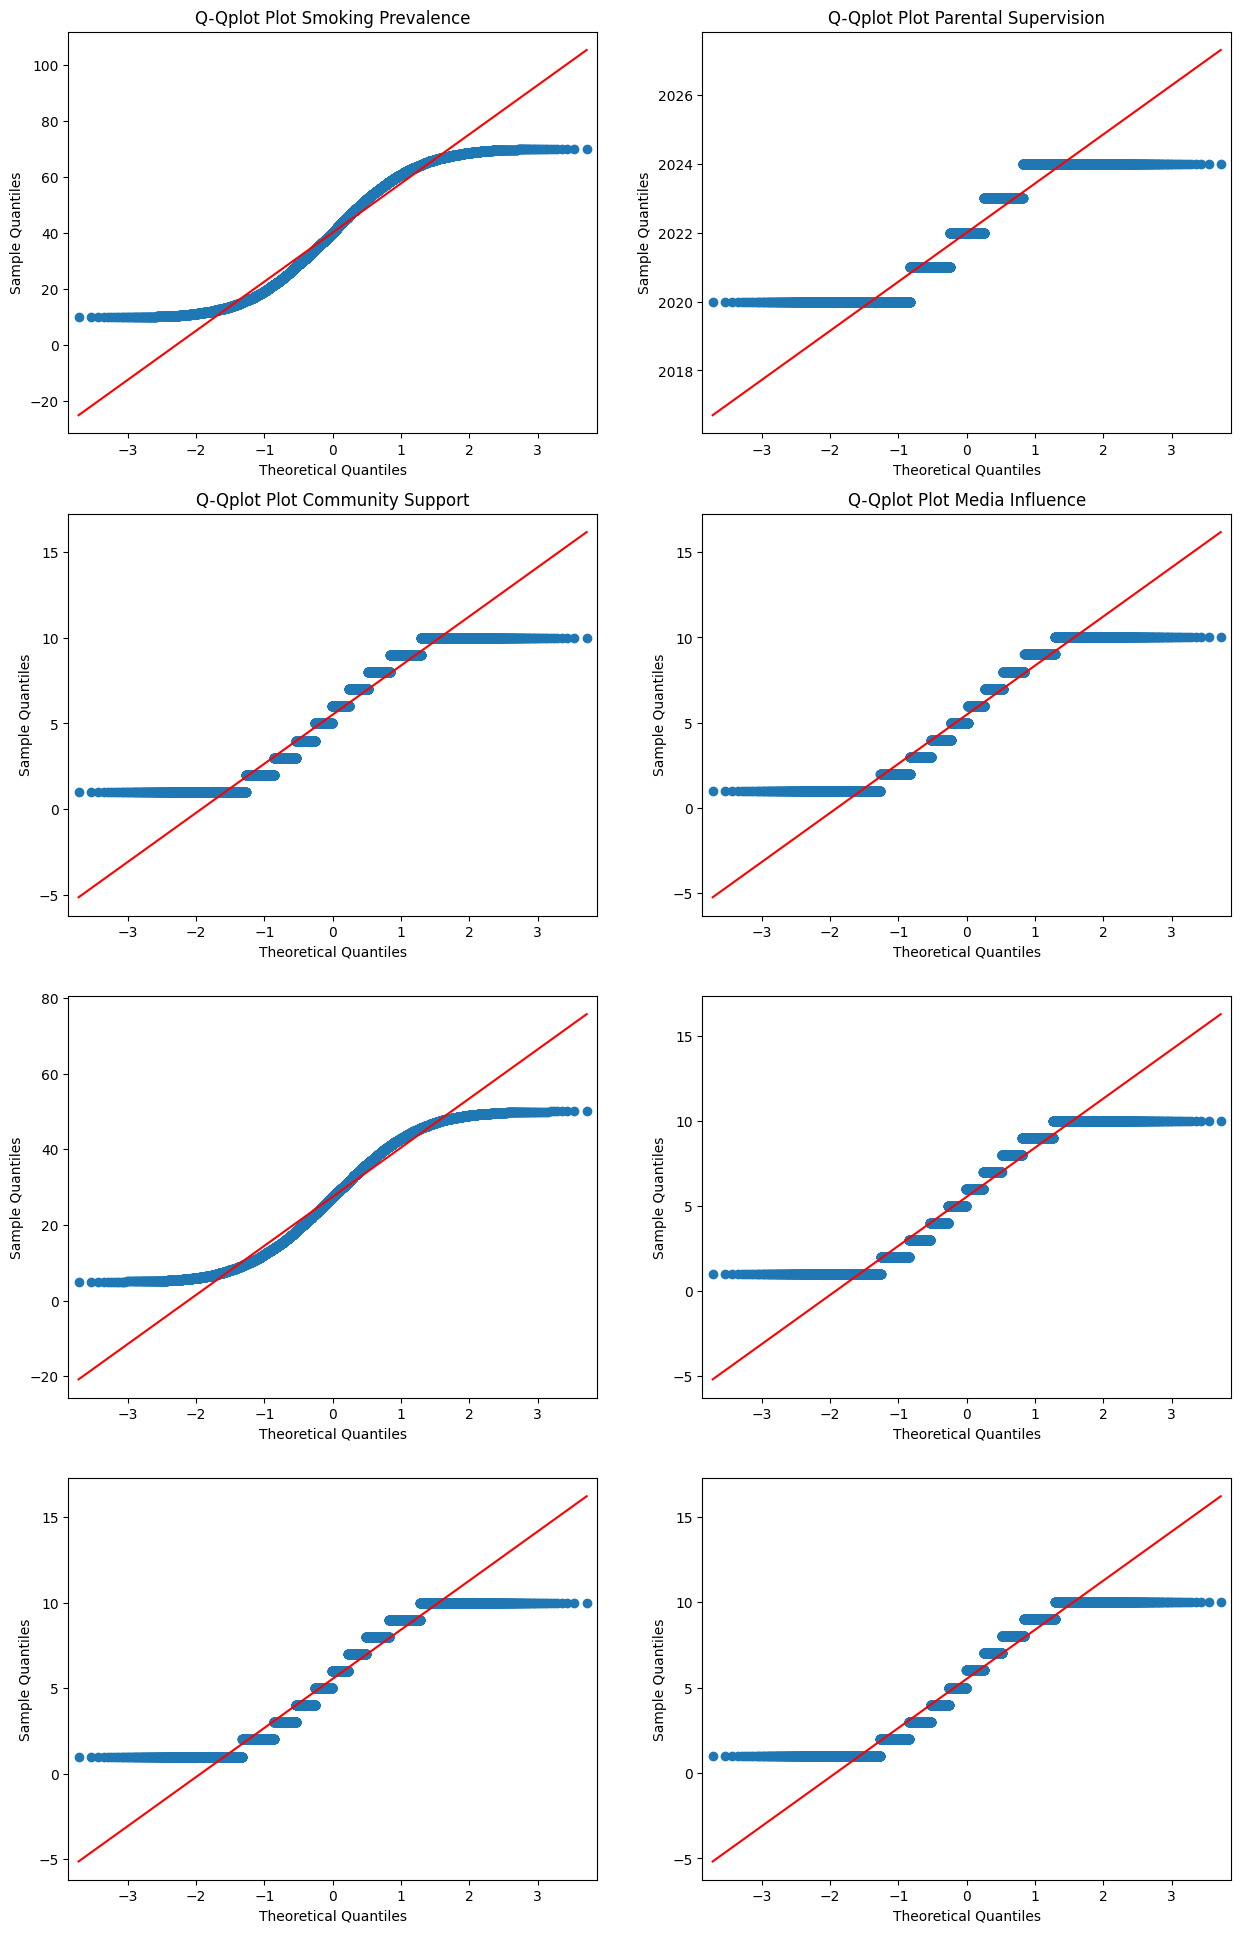

In [226]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(4, 2, figsize=(15, 24))

sm.graphics.qqplot(df["Drug_Experimentation"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot Drug Experimentation')

sm.graphics.qqplot(df["Year"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot Year')

sm.graphics.qqplot(df["Family_Background"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot Family Bcakground')

sm.graphics.qqplot(df["Mental_Health"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot Mental Health')

sm.graphics.qqplot(df["Smoking_Prevalence"].dropna(), line='s', ax=axes[2, 0])
axes[0, 0].title.set_text('Q-Qplot Plot Smoking Prevalence')

sm.graphics.qqplot(df["Parental_Supervision"].dropna(), line='s', ax=axes[2, 1])
axes[0, 1].title.set_text('Q-Qplot Plot Parental Supervision')

sm.graphics.qqplot(df["Community_Support"].dropna(), line='s', ax=axes[3, 0])
axes[1, 0].title.set_text('Q-Qplot Plot Community Support')

sm.graphics.qqplot(df["Media_Influence"].dropna(), line='s', ax=axes[3, 1])
axes[1, 1].title.set_text('Q-Qplot Plot Media Influence')

plt.show()

In [227]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = df2.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.886, p=0.000
Tolak H0, Year tidak berdistribusi normal
Statistics=0.955, p=0.000
Tolak H0, Smoking_Prevalence tidak berdistribusi normal
Statistics=0.953, p=0.000
Tolak H0, Drug_Experimentation tidak berdistribusi normal
Statistics=0.936, p=0.000
Tolak H0, Family_Background tidak berdistribusi normal
Statistics=0.935, p=0.000
Tolak H0, Mental_Health tidak berdistribusi normal
Statistics=0.934, p=0.000
Tolak H0, Parental_Supervision tidak berdistribusi normal
Statistics=0.934, p=0.000
Tolak H0, Community_Support tidak berdistribusi normal
Statistics=0.935, p=0.000
Tolak H0, Media_Influence tidak berdistribusi normal


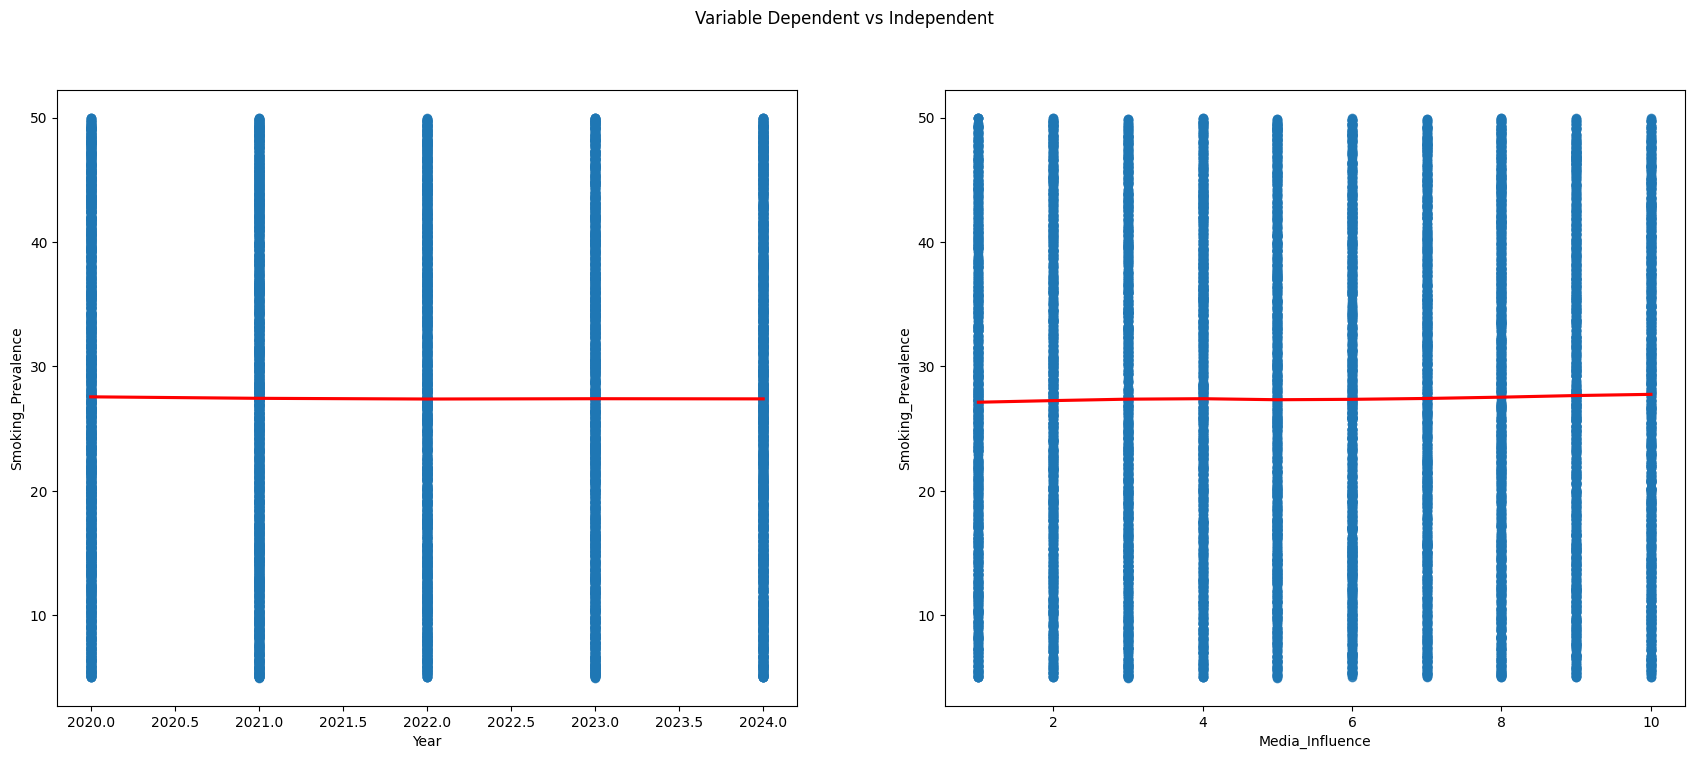

In [249]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 2, figsize=(21, 8))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["Year"], y=df["Smoking_Prevalence"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=df["Media_Influence"], y=df["Smoking_Prevalence"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])


plt.show()

In [237]:
import matplotlib.pyplot as plt

<Axes: >

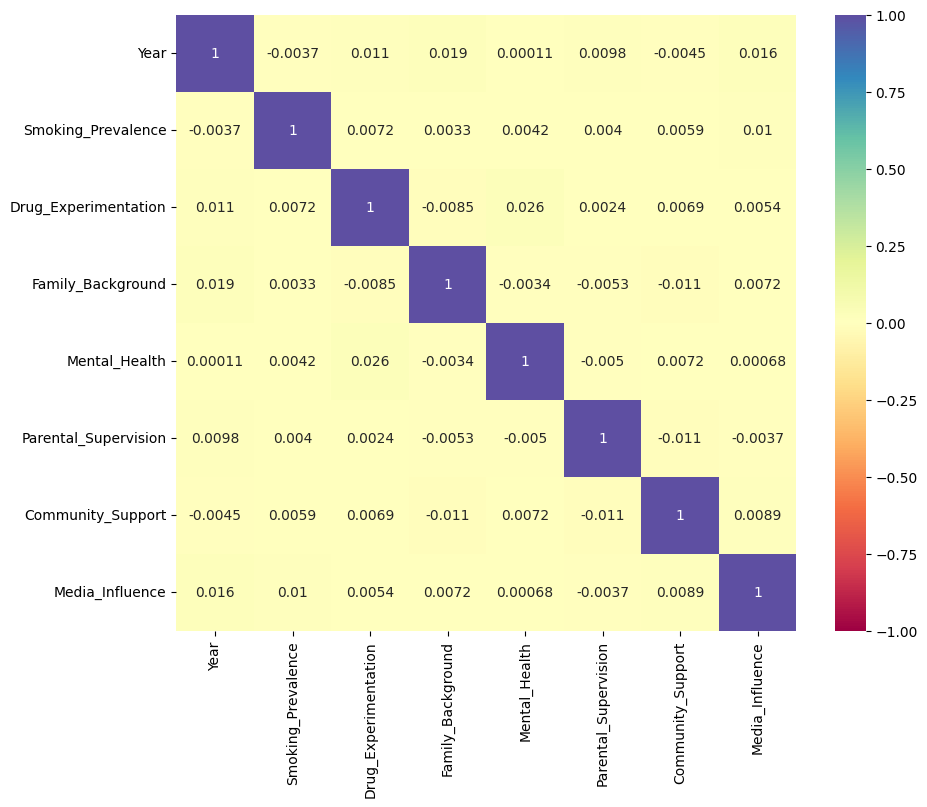

In [250]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [251]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df2.corr()["Family_Background"].sort_values()
korelasi

Community_Support      -0.010805
Drug_Experimentation   -0.008460
Parental_Supervision   -0.005290
Mental_Health          -0.003400
Smoking_Prevalence      0.003342
Media_Influence         0.007177
Year                    0.018946
Family_Background       1.000000
Name: Family_Background, dtype: float64

Diperoleh :
korelasi antara Family Background dengan Year: 0.019
korelasi antara Family Background dengan Smoking Prevalence: 0.0033
korelasi antara Family Background dengan Drug Experimentation: -0.0085
korelasi antara Family Background dengan Mental Health: -0.0034
korelasi antara Family Background dengan Parental Supervision: -0.0053
korelasi antara Family Background dengan Community Support: -0.011
korelasi antara Family Background dengan Media Influence: 0.0072

In [255]:
df2.dropna(axis=1, inplace=True)


In [256]:
korelasi = df2.corr()["Family_Background"].sort_values()
korelasi

Community_Support      -0.010805
Drug_Experimentation   -0.008460
Parental_Supervision   -0.005290
Mental_Health          -0.003400
Smoking_Prevalence      0.003342
Media_Influence         0.007177
Year                    0.018946
Family_Background       1.000000
Name: Family_Background, dtype: float64

In [257]:
scaler = StandardScaler()
scaled_smoking= scaler.fit_transform(df2)
scaled_smoking

array([[ 1.40320117e+00, -6.61991311e-01, -4.42487224e-01, ...,
        -5.28469345e-01, -8.86571192e-01, -1.56863297e+00],
       [ 1.40320117e+00,  5.73473027e-01,  8.10627835e-02, ...,
         1.20081516e+00,  1.20390556e+00, -8.72421986e-01],
       [ 7.01425141e-01,  1.12222575e+00,  9.50601127e-01, ...,
        -1.22018315e+00, -1.89745607e-01, -1.56863297e+00],
       ...,
       [-7.02126917e-01,  1.55537045e+00, -3.48375998e-02, ...,
        -1.56604005e+00, -1.89745607e-01,  1.56431646e+00],
       [-3.50888015e-04, -1.39263398e+00, -1.62775420e+00, ...,
        -1.22018315e+00,  1.55231836e+00, -5.24316493e-01],
       [ 7.01425141e-01,  1.25864321e+00, -1.03911728e+00, ...,
        -1.56604005e+00,  1.58667186e-01, -8.72421986e-01]])

In [259]:
# Membuat dataframe dari hasil scalling
scaled_smoking = pd.DataFrame(scaled_smoking, columns=df2.columns)
scaled_smoking


,Year,Smoking_Prevalence,Drug_Experimentation,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence
0,1.403201,-0.661991,-0.442487,-1.575381,-0.163171,-0.528469,-0.886571,-1.568633
1,1.403201,0.573473,0.081063,1.566096,-0.163171,1.200815,1.203906,-0.872422
2,0.701425,1.122226,0.950601,-1.226328,0.531470,-1.220183,-0.189746,-1.568633
3,1.403201,0.486382,0.156998,1.217043,0.531470,-1.220183,1.552318,1.216211
4,0.701425,1.576951,-0.030270,-1.226328,-0.510492,-0.528469,1.552318,-0.872422
...,...,...,...,...,...,...,...,...
9995,0.701425,1.674832,-1.709398,-0.528222,-0.163171,0.509101,-1.234984,1.216211
9996,-1.403903,1.584658,-0.530983,0.867990,0.878791,-0.528469,0.855493,1.216211
9997,-0.702127,1.555370,-0.034838,0.518937,-1.205134,-1.566040,-0.189746,1.564316
9998,-0.000351,-1.392634,-1.627754,1.566096,-1.552455,-1.220183,1.552318,-0.524316


In [99]:
import pandas as pd
import numpy as np


In [104]:
# Mengganti NaN dengan 0 di numpy array
data = np.nan_to_num(df, nan=0)


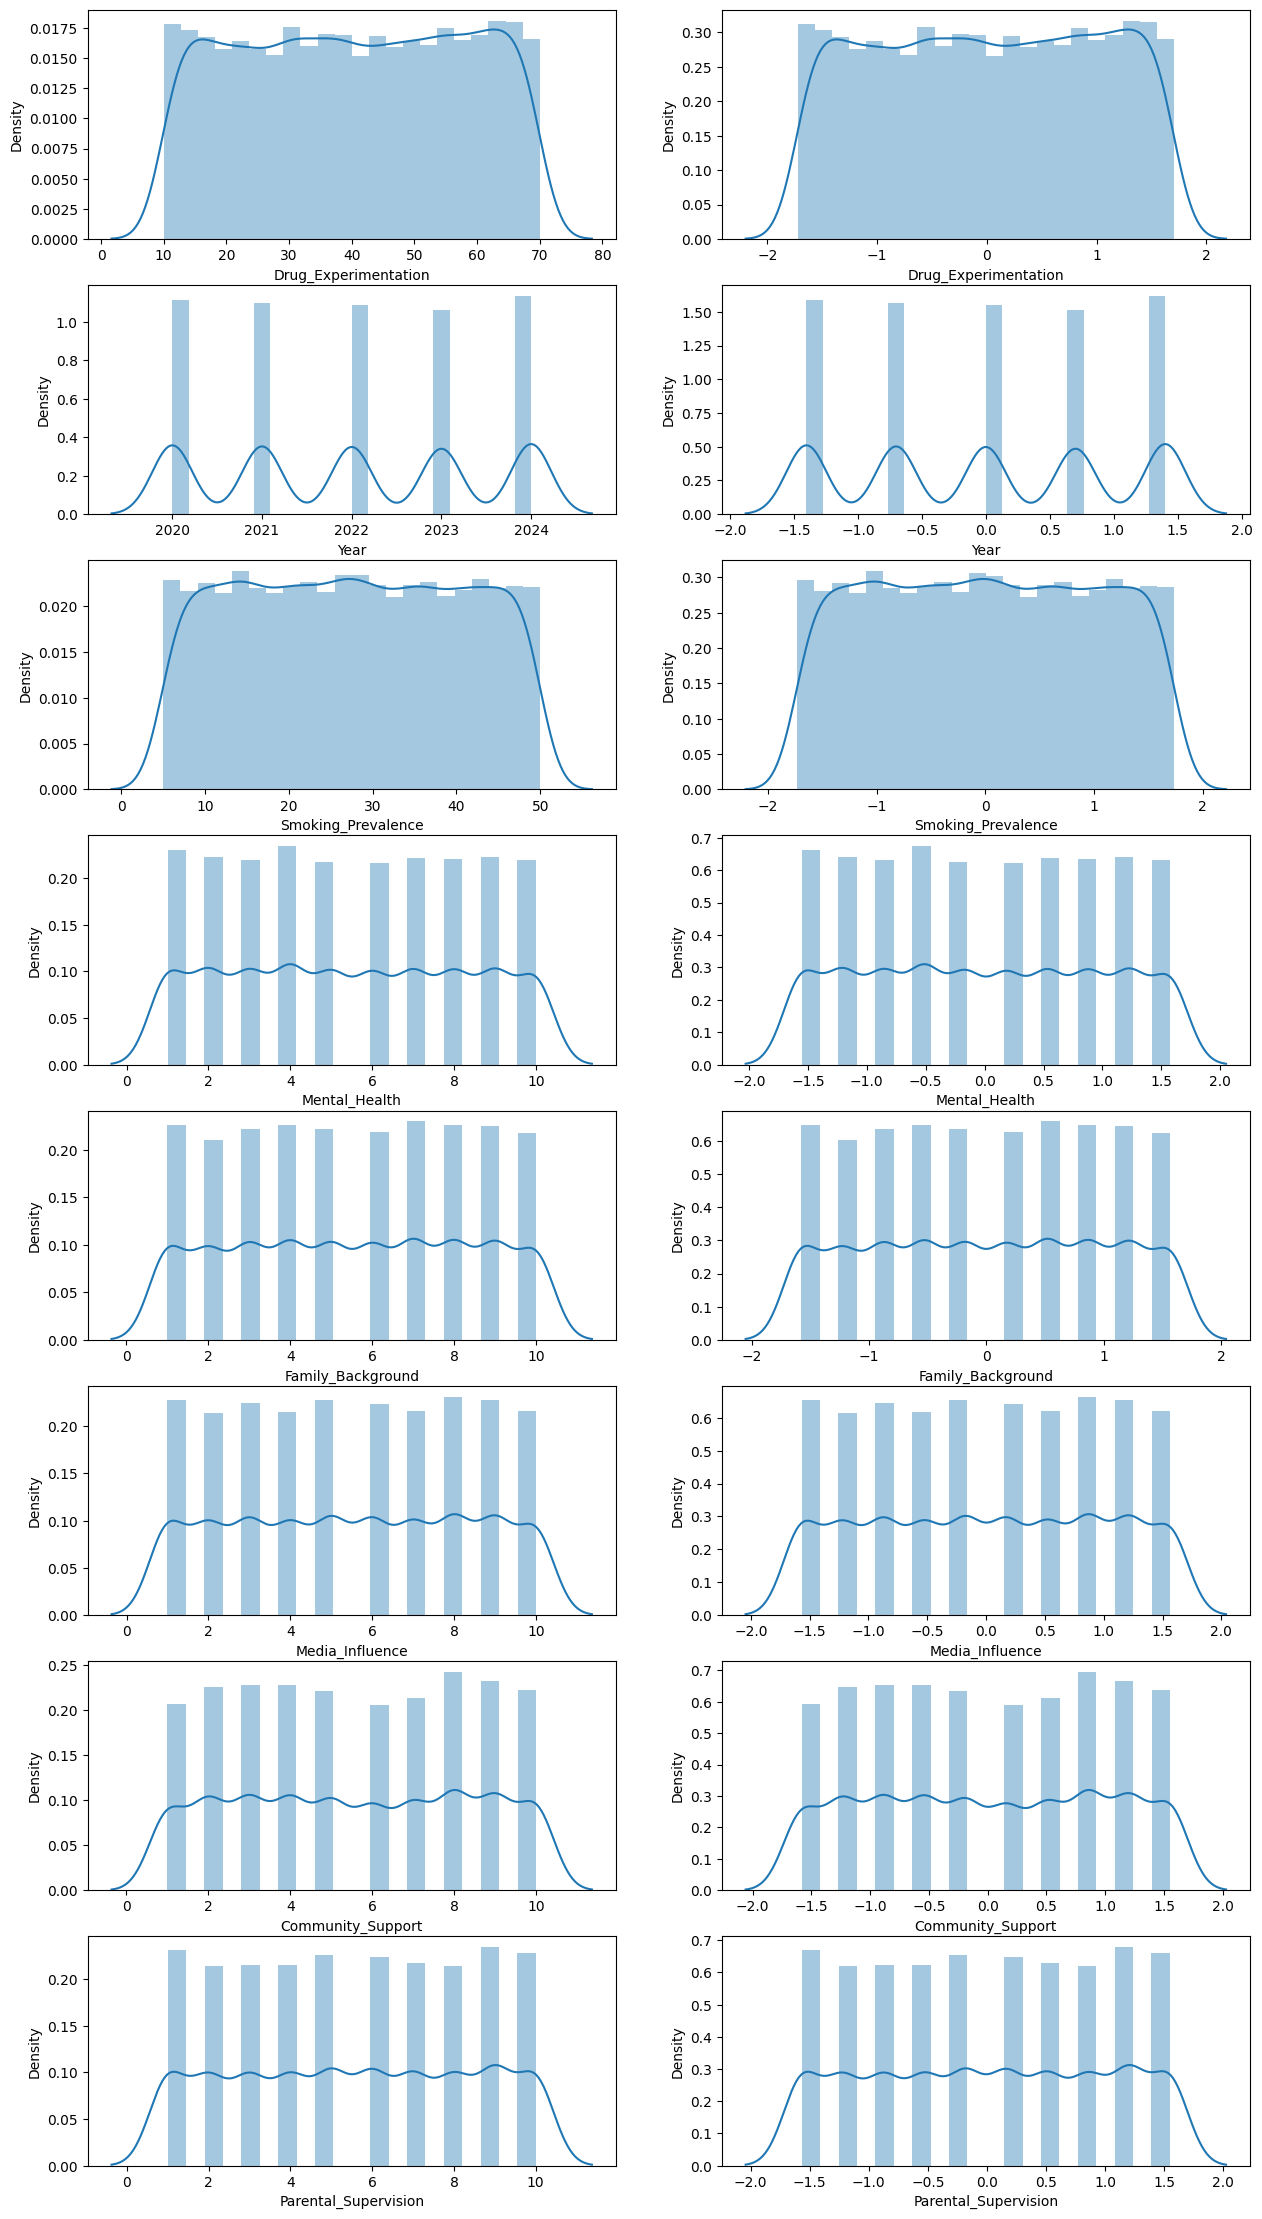

In [263]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(8, 2, figsize=(15, 28))

sns.distplot(df2["Drug_Experimentation"], ax=axes[0, 0])
sns.distplot(scaled_smoking["Drug_Experimentation"], ax=axes[0, 1])
sns.distplot(df2["Year"], ax=axes[1, 0])
sns.distplot(scaled_smoking["Year"], ax=axes[1, 1])
sns.distplot(df2["Smoking_Prevalence"], ax=axes[2, 0])
sns.distplot(scaled_smoking["Smoking_Prevalence"], ax=axes[2, 1])
sns.distplot(df2["Mental_Health"], ax=axes[3, 0])
sns.distplot(scaled_smoking["Mental_Health"], ax=axes[3, 1])
sns.distplot(df2["Family_Background"], ax=axes[4, 0])
sns.distplot(scaled_smoking["Family_Background"], ax=axes[4, 1])
sns.distplot(df2["Media_Influence"], ax=axes[5, 0])
sns.distplot(scaled_smoking["Media_Influence"], ax=axes[5, 1])
sns.distplot(df2["Community_Support"], ax=axes[6, 0])
sns.distplot(scaled_smoking["Community_Support"], ax=axes[6, 1])
sns.distplot(df2["Parental_Supervision"], ax=axes[7, 0])
sns.distplot(scaled_smoking["Parental_Supervision"], ax=axes[7, 1])
plt.show()

In [304]:
X = scaled_smoking.drop("Smoking_Prevalence", axis=1).values
y = scaled_smoking["Smoking_Prevalence"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [305]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  7000
Ukuran X test  3000
Ukuran y train  7000
Ukuran y test  3000


In [306]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [307]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [308]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6257
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.735
Time:                        05:38:25   Log-Likelihood:                -9930.1
No. Observations:                7000   AIC:                         1.988e+04
Df Residuals:                    6992   BIC:                         1.993e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0051      0.012      0.425      0.6

Dari output diatas, kita dapat melihat nilai-nilai:
Semua variabel (x1 sampai x7) memiliki nilai p>|t| lebih besar dari 0.05:

x1 = 0.501
x2 = 0.204
x3 = 0.342
Dan seterusnya. Ini menunjukkan bahwa semua variabel independen tidak memberikan pengaruh yang signifikan terhadap variabel dependen.

nilai koefisien untuk masing-masing variabel:

x1 = -0.0080, artinya jika x1 bertambah satu unit, maka Smoking Prevalence berkurang 0.0080 unit
x2 = 0.0152, artinya jika x2 bertambah satu unit, maka Smoking Prevalence bertambah 0.0152 unit
x3 = 0.0114, artinya jika x3 bertambah satu unit, maka Smoking Prevalence bertambah 0.0114 unit
Dan seterusnya untuk variabel lainnya.

Nilai R-squared sebesar -0.000, artinya model ini tidak dapat menjelaskan variasi dalam Moking Prevalence dengan baik. Nilai negatif menunjukkan model yang sangat lemah.
Nilai AIC adalah 1.988e+04 dan BIC adalah 1.993e+04. Nilai-nilai ini dapat digunakan untuk membandingkan dengan model lain, dimana model dengan nilai AIC dan BIC yang lebih kecil akan lebih baik.

Konstanta (const) sebesar 0.0051 dengan p-value 0.671 > 0.05 menunjukkan bahwa intercept tidak signifikan dalam model.

In [309]:

print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.0006260549020647987
adjusted coefficient of determination: -0.00037446249148298527
regression coefficients: [ 0.00508315 -0.00802096  0.01521468  0.01136981  0.00103361  0.00333664
  0.00159967  0.01409399]


In [310]:
# membuat list
list_columns = []

for i in df2.columns:
  if i != "Smoking":
    list_columns.append(i)

In [311]:
list_columns

['Year',
 'Smoking_Prevalence',
 'Drug_Experimentation',
 'Family_Background',
 'Mental_Health',
 'Parental_Supervision',
 'Community_Support',
 'Media_Influence']

In [326]:

list_columns = ['Year', 'Smoking_Prevalence', 'Drug_Experimentation', 'Family_Background', 'Mental_Health', 'Parental_Supervision', 'Community_Support']
list_columns = ['Media_Influence'] + list_columns  # Menambahkan konstanta di awal list


df_statsmod = pd.DataFrame(Input_test, columns=list_columns)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1
print(df_statsmod.shape)  
df_statsmod.head()



(3000, 10)


,Media_Influence,Year,Smoking_Prevalence,Drug_Experimentation,Family_Background,Mental_Health,Parental_Supervision,Community_Support,actual_price,prediction_price
0,1.0,-1.403903,1.177834,-1.575381,-0.163171,-1.566040,-0.886571,-0.524316,1.639379,0.002151
1,1.0,-0.702127,1.410777,0.867990,-1.552455,1.200815,-0.189746,1.216211,1.038217,0.061288
2,1.0,-1.403903,-1.487874,-0.179169,-0.163171,-0.528469,-1.234984,0.171894,-1.407278,-0.009816
3,1.0,-1.403903,-1.049965,-0.877275,-0.857813,1.546672,-0.538158,1.564316,0.147265,0.015855
4,1.0,0.701425,0.471013,-0.528222,-1.205134,-1.220183,0.507080,-1.220527,1.003535,-0.021090


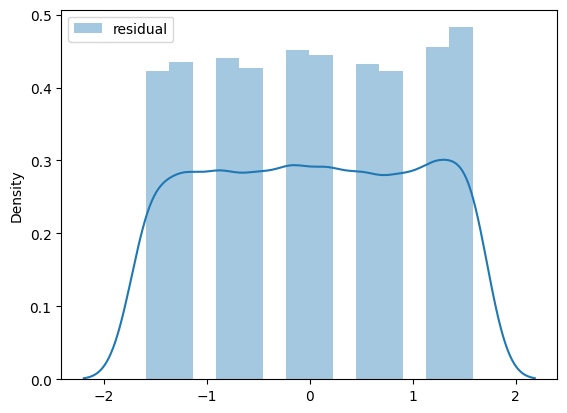

In [322]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [321]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.938, p=0.000
Tolak H0, residual tidak berdistribusi normal


Dari gambar diatas, plot residual yang dihasilkan tidak membentuk lonceng, dan pada pengujian normalitas dengan uji Shapiro-Wilk menunjukkan bahwa residual tidak berdistribusi normal. Sehingga dapat disimpulkan residual tidak berdistribusi normal.

In [320]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,Media_Influence,Year,Smoking_Prevalence,Drug_Experimentation3,Family_Background,Mental_Health,Parental_Supervision,Community_Support,actual_price,prediction_price,residual
0,1.0,-1.403903,1.639379,1.177834,-1.575381,-0.163171,-0.886571,-0.524316,-1.566040,0.020496,-1.586536
1,1.0,-0.702127,1.038217,1.410777,0.867990,-1.552455,-0.189746,1.216211,1.200815,-0.003046,1.203861
2,1.0,-1.403903,-1.407278,-1.487874,-0.179169,-0.163171,-1.234984,0.171894,-0.528469,-0.012319,-0.516150
3,1.0,-1.403903,0.147265,-1.049965,-0.877275,-0.857813,-0.538158,1.564316,1.546672,-0.013406,1.560078
4,1.0,0.701425,1.003535,0.471013,-0.528222,-1.205134,0.507080,-1.220527,-1.220183,0.002688,-1.222871


<function matplotlib.pyplot.show(close=None, block=None)>

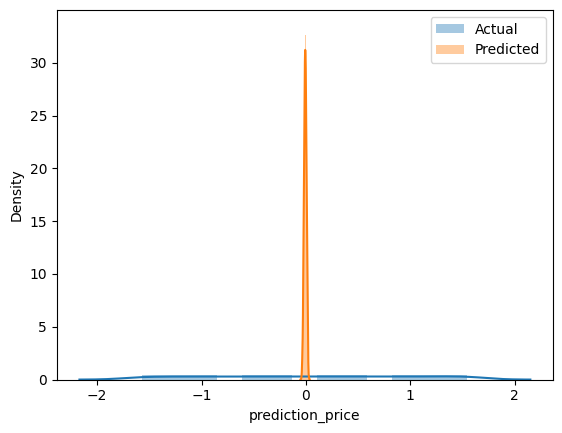

In [319]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_price'], label="Actual")
sns.distplot(df_statsmod['prediction_price'], label="Predicted")
plt.legend()
plt.show

Skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.

In [318]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

np.float64(1.981207819075292)

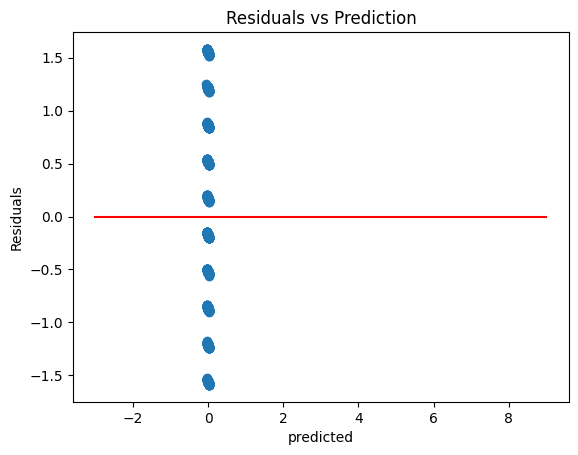

In [317]:
asm_homosk = plt.scatter(df_statsmod['prediction_price'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
sns.lineplot(x=[-3, 9], y=[0, 0], color='red')
asm_homosk = plt.title('Residuals vs Prediction')

In [316]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_price'], df_statsmod['prediction_price']))

R-square : -0.00021592379105794812


In [315]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MSE : 0.996693200359094


In [314]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5, t_test_X6, t_test_X7= results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)
print("T-test score X6: ", t_test_X6)
print("T-test score X7: ", t_test_X7)

T-test score const:  0.42515858203153234
T-test score X1:  -0.6736533145383865
T-test score X2:  1.2712777132715147
T-test score X3:  0.949917102580379
T-test score X4:  0.08702899019146274
T-test score X5:  0.2792786617595704
T-test score X6:  0.13427819944845187
T-test score X7:  1.1802172999929976


In [313]:

p_value_const, p_value_X1, p_value_X2, p_value_X3,p_value_X4, p_value_X5, p_value_X6, p_value_X7 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)
print("P-value X6: ", p_value_X6)
print("P-value X7: ", p_value_X7)

P-value const:  0.6707341586162774
P-value X1:  0.5005540165377114
P-value X2:  0.20367215662037458
P-value X3:  0.3421872079234145
P-value X4:  0.9306509607938813
P-value X5:  0.7800392406747454
P-value X6:  0.8931864561842506
P-value X7:  0.23795394990396598


Diperoleh dari output diatas, bahwa P-value ketujuh variabel lebih dari 0,05 sehingga Hypothesis null diterima dan dapat disimpulkan, bahwa ketujuh variabel independen (X) tidak memberikan pengaruh secara signifikan pada variabel dependen Smoking Prevalence (Y).

In [312]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  0.6257311528037613
P-value :  0.7350776326000441
Terima H0


Dari output diatas, diperoleh p-value lebih dari 0,05 sehingga hypothesis null diterima dan dapat disimpulkan bahwa model regresi dari ketiga variabel independen dan variabel dependen Smokling Prevalence (Y) tidak layak digunakan.